In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df = pd.read_csv('/content/flights.csv', dtype=str)
df_a = pd.read_csv('/content/airlines.csv', dtype=str)

In [133]:
df_ap = pd.read_csv('/content/airports.csv', dtype=str)

In [77]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

In [78]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.loc[df.DATE <= pd.to_datetime('2015-02-14')]
#df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
#cols = list(df.columns)
#df = df[cols[-1:] + cols[:-1]]
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017247 entries, 0 to 4093008
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 object        
 1   MONTH                object        
 2   DAY                  object        
 3   DAY_OF_WEEK          object        
 4   AIRLINE              object        
 5   FLIGHT_NUMBER        object        
 6   TAIL_NUMBER          object        
 7   ORIGIN_AIRPORT       object        
 8   DESTINATION_AIRPORT  object        
 9   SCHEDULED_DEPARTURE  object        
 10  DEPARTURE_TIME       object        
 11  DEPARTURE_DELAY      object        
 12  TAXI_OUT             object        
 13  WHEELS_OFF           object        
 14  SCHEDULED_TIME       object        
 15  ELAPSED_TIME         object        
 16  AIR_TIME             object        
 17  DISTANCE             object        
 18  WHEELS_ON            object        
 19  TAXI_IN              

In [79]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

### Зависимость задержек от дня недели.


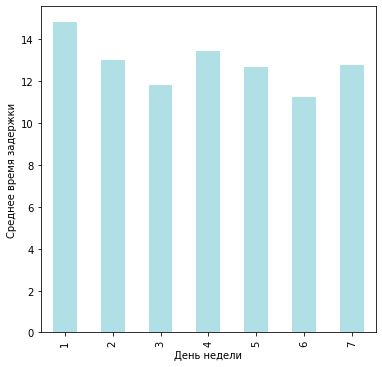

In [170]:
df['DEPARTURE_DELAY'] = df.DEPARTURE_DELAY.astype(float)
df.loc[df.DEPARTURE_DELAY < 0, 'DEPARTURE_DELAY'] = 0
df.DAY_OF_WEEK = df.DAY_OF_WEEK.astype(int)
day_of_week = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
day_of_week.plot.bar(figsize=(6,6),  color = 'powderblue')
plt.xlabel('День недели')
plt.ylabel('Среднее время задержки')
plt.show()

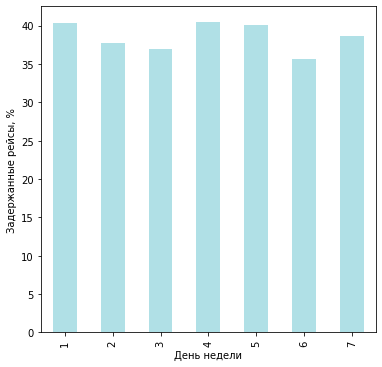

In [169]:
df.loc[df.DEPARTURE_DELAY > 0, 'DAY_OF_WEEK'].value_counts()
number_per_week = df.loc[df.DEPARTURE_DELAY > 0, 'DAY_OF_WEEK'].value_counts()/df['DAY_OF_WEEK'].value_counts()*100
number_per_week.plot.bar( figsize=(6,6), color = 'powderblue')
plt.xlabel('День недели')
plt.ylabel('Задержанные рейсы, %')
plt.show()

Чаще рейсы задерживаются по четвергам, при этом среднее время задержки меньше, чем в понедельник, но больше чем в пятницу.

### Зависимость задержек от месяца.

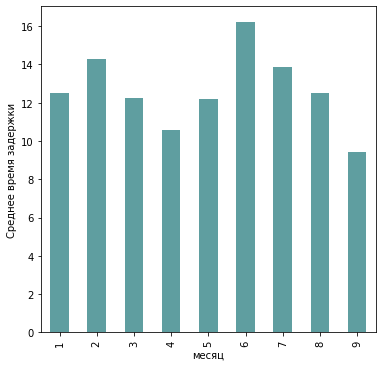

In [171]:
month = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()
month.plot.bar(figsize=(6,6),  color = 'cadetblue')
plt.xlabel('месяц')
plt.ylabel('Среднее время задержки')
plt.show()

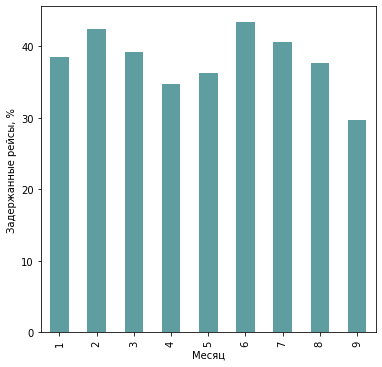

In [172]:
df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()
number_per_week = df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()/df['MONTH'].value_counts()*100
number_per_week.plot.bar(figsize=(6,6), color = 'cadetblue')
plt.xlabel('Месяц')
plt.ylabel('Задержанные рейсы, %')
plt.show()

Самые частые и долгие задержки приходятся на приздник и сезон отпусков.

## Зависимость задержек от времени отправления


In [89]:
df['HOUR'] = df.SCHEDULED_DEPARTURE.astype(int)/100
df['HOUR'] = df.HOUR.astype(int)
df['SCHEDULED_DEPARTURE'] = df.SCHEDULED_DEPARTURE.astype(float)

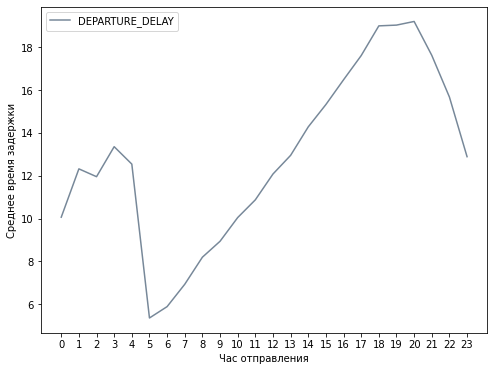

In [163]:
hour = pd.DataFrame(df.groupby('HOUR')['DEPARTURE_DELAY'].mean())
#hour.plot.bar(figsize=(6,6), color = 'lightslategray')
hour.plot(figsize=(8,6), color = 'lightslategray')
plt.xlabel('Час отправления')
plt.ylabel('Среднее время задержки')
plt.xticks( np.sort(df['HOUR'][df['HOUR'].notna()].unique()))
plt.show()

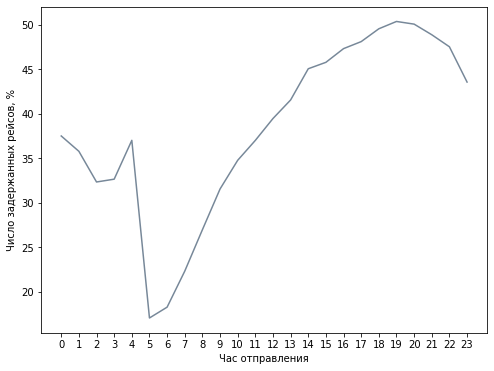

In [167]:
df.loc[df.DEPARTURE_DELAY > 0, 'HOUR'].value_counts()
number = df.loc[df.DEPARTURE_DELAY > 0, 'HOUR'].value_counts()/df['HOUR'].value_counts()*100
number.plot(figsize=(8,6), color = 'lightslategray')
plt.xlabel('Час отправления')
plt.ylabel('Число задержанных рейсов, %')
plt.xticks( np.sort(df['HOUR'][df['HOUR'].notna()].unique()))
plt.show()

Ночные и вечерние рейсы задерживаются чаще. Число рейсов в час и время задержки положительно коррелируют.

### Рассмотрим зависимость задержки от времени полета 

In [ ]:
#print(df['AIR_TIME']) 
df = df.loc[~df[['AIR_TIME']].isna().any(axis=1)]
df['AT_HOUR'] = df.AIR_TIME.astype(int)/60
df['AT_HOUR'] = df.AT_HOUR.astype(int)

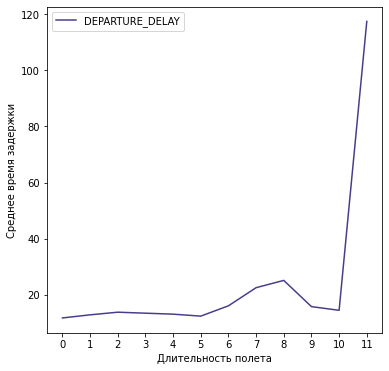

In [ ]:
#print(df['AT_HOUR'])
at_hour = pd.DataFrame(df.groupby('AT_HOUR')['DEPARTURE_DELAY'].mean())
at_hour.plot(figsize=(6,6), color = 'darkslateblue')
plt.xlabel('Длительность полета')
plt.ylabel('Среднее время задержки')
plt.xticks( np.sort(df['AT_HOUR'][df['AT_HOUR'].notna()].unique()))
plt.show()

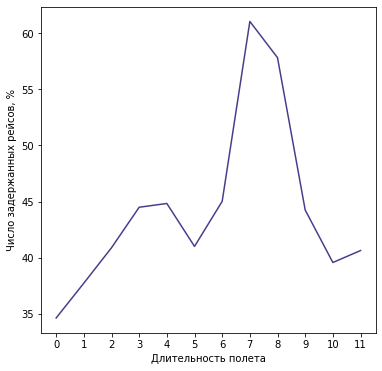

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'AT_HOUR'].value_counts()
number = df.loc[df.DEPARTURE_DELAY > 0, 'AT_HOUR'].value_counts()/df['AT_HOUR'].value_counts()*100
number.plot(figsize=(6,6), color = 'darkslateblue')
plt.xlabel('Длительность полета')
plt.ylabel('Число задержанных рейсов, %')
plt.xticks( np.sort(df['AT_HOUR'][df['AT_HOUR'].notna()].unique()))
plt.show()

В среднем время задержки не превышает 20 минут, но для полетов с длительностью более 11 часов это значение резко возрастает. Реже задерживаются рейсы с длительностью полета менее часа, чаще с длительностью полета от 7 до 8 часов.

### Компании с самыми частыми задержками (в % соотношении)

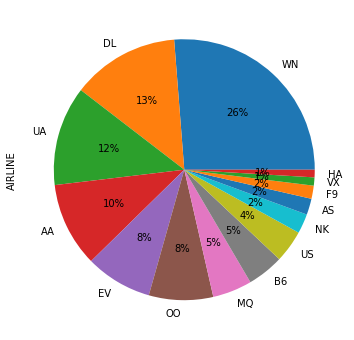

In [64]:
cmp = df.loc[df.DEPARTURE_DELAY > 0, 'AIRLINE'].value_counts()/len(df)*100
cmp.plot.pie(figsize=(6,6), autopct='%1.0f%%')

Большая часть задержек приходится на авиакомпании Southwest Airlines Co.(WN), Delta Air Lines Inc.(DL) и  United Air Lines Inc.(UA)

### Топ 10 аэропортов с самыми частыми задержками (в % соотношении)

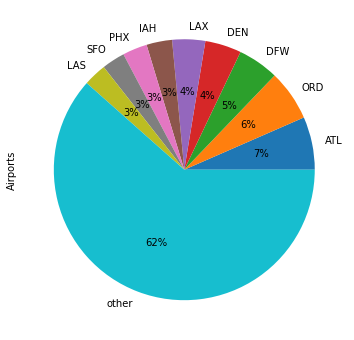

In [144]:
arp = df.loc[df.DEPARTURE_DELAY > 0, 'ORIGIN_AIRPORT'].value_counts()
arp_ = arp[:9].copy()
sr2 = pd.Series([arp.sum() - arp_.sum()])
index_2 = ['other']
sr2.index = index_2
result = arp_.append(sr2, ignore_index = False)
result.plot.pie(figsize=(6,6), autopct='%1.0f%%', label = 'Airports')
#arp.plot.pie(figsize=(6,6), autopct='%1.0f%%')
#print(arp_, )
plt.show()


Треть задержек приходится на 9 аэропортов. И почти половина из них на аэропорты ATL, ORD и DFW

### Рассмотрим зависимость числа задержек от номера рейса

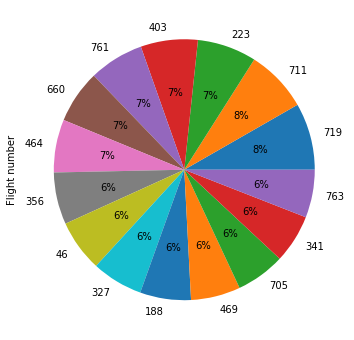

In [195]:
fn = df.loc[df.DEPARTURE_DELAY > 0, 'FLIGHT_NUMBER'].value_counts()
fn_ = fn[:15].copy()
fn_.plot.pie(figsize=(6,6), autopct='%1.0f%%', label = 'Flight number')
plt.show()

Можно сказать, что количество задержек не зависит от рейса. Все рейсы имеют приблизительно одинаковое число задержек.
